<h1 style="text-align: center;">Credit Card Fraud Detection</h1>

---

### Introduction
In this analysis, I will employ undersampling technique to deal with imbalanced dataset. We also build different predictive models to evaluate their effectiveness in distinguishing between normal payment transactions and fraudulent ones. Let's dive in and begin our analysis!

### Objective
- Clean and preprocess the dataset.
- Explore the techniques to work with an imbalanced dataset.
- Find the best classification model.
- Work with Expected Value framework.  

### Outline
1. [Data Review](#datareview)

2. [Techniques to Handle Imbalanced Data](#technique)

3. [Modeling: Deal with imbalanced data](#model)

    - [Data Splitting](#datasplitting) 
    
    - [Advantage & Disadvantage of the undersampling technique](#adv) 
    
    - [Implement the undersampling technique (50/50 ratio)](#implement0.5)
         
    - [Implement the undersampling technique (80/20 ratio)](#implement0.2)
        
4. [A Key Analytical Framework: Expected Value](#expectedvalue)
    
    - [Calculate Expected Value](#calculateexpectedvalue)

    - [Using Expected Value to choose the appropriate balance between Precision and Recall](#useexpectedvalue)

    - [Decision Making base on the Expected Value framework](#decisionexpectedvalue)

5. [Conclusion](#conclusion)
---

## 1. Data review <a name="datareview"></a>

### About the dataset ([Data Source](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud))

In this dataset, there are transactions recorded over a period of two days, consisting of 492 instances of fraud out of a total of 284,807 transactions. The dataset exhibits a significant class imbalance, with the positive class (frauds) comprising only 0.172% of all transactions. 


**Target variable:**
- *'Class':* This is a binary variable where 0 represents "Not fraud" and 1 represents "Fraud". 

**Feature variables:** 
- *'Time':* The seconds elapsed between each transaction and the first transaction in the dataset.
- *'Amount':* The transaction amount.
- *'V1', 'V2', ..., 'V28':* The principal components resulting from the PCA transformation. Due to confidentiality reasons, the original features and additional background information about the data cannot be provided. 

**Now, let's examine the dataset to gain insights, understand the data and identify any potential issues or trends.**

In [1]:
# import libraries
library(scales)
library(corrplot)
library(reshape2)
library(caret)
library(randomForest)
library(dplyr)
library(ggplot2)
library(caTools)
library(ROSE)
library(smotefamily)
library(pROC)
library(PRROC)

corrplot 0.92 loaded

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loaded ROSE 0.0-4


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘PRROC’


The following object is masked from ‘package:ROSE’:

    roc.curve




In [2]:
# load creditcard dataset into R
df <- read.csv('/kaggle/input/creditcardfraud/creditcard.csv')
head(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [3]:
# check the structure of all variables in the dataset
str(df)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [4]:
# check for null values
print(paste("Number NA values in df:", sum(is.na(df))))

[1] "Number NA values in df: 0"


**Null values:** There is no null values in the dataset.

In [5]:
# check the min, max, mean, median, and 1st and 3rd quartiles of all variables
summary(df)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [6]:
# check the standard deviation of all the variables
lapply(df, sd)

$Time
[1] 47488.15

$V1
[1] 1.958696

$V2
[1] 1.651309

$V3
[1] 1.516255

$V4
[1] 1.415869

$V5
[1] 1.380247

$V6
[1] 1.332271

$V7
[1] 1.237094

$V8
[1] 1.194353

$V9
[1] 1.098632

$V10
[1] 1.08885

$V11
[1] 1.020713

$V12
[1] 0.9992014

$V13
[1] 0.9952742

$V14
[1] 0.9585956

$V15
[1] 0.915316

$V16
[1] 0.8762529

$V17
[1] 0.8493371

$V18
[1] 0.8381762

$V19
[1] 0.8140405

$V20
[1] 0.770925

$V21
[1] 0.734524

$V22
[1] 0.7257016

$V23
[1] 0.6244603

$V24
[1] 0.6056471

$V25
[1] 0.5212781

$V26
[1] 0.482227

$V27
[1] 0.4036325

$V28
[1] 0.3300833

$Amount
[1] 250.1201

$Class
[1] 0.04152719

In [7]:
# check the frequency of the target variable in the original dataset
print("Class Frequency || 0: Not Fraud & 1: Fraud")
table(df$Class)

# check the proportion (%) of the target variable in the original dataset
print("Class Proportion (%) || 0: Not Fraud & 1: Fraud")
prop.table(table(df$Class)) * 100

[1] "Class Frequency || 0: Not Fraud & 1: Fraud"



     0      1 
284315    492 

[1] "Class Proportion (%) || 0: Not Fraud & 1: Fraud"



         0          1 
99.8272514  0.1727486 

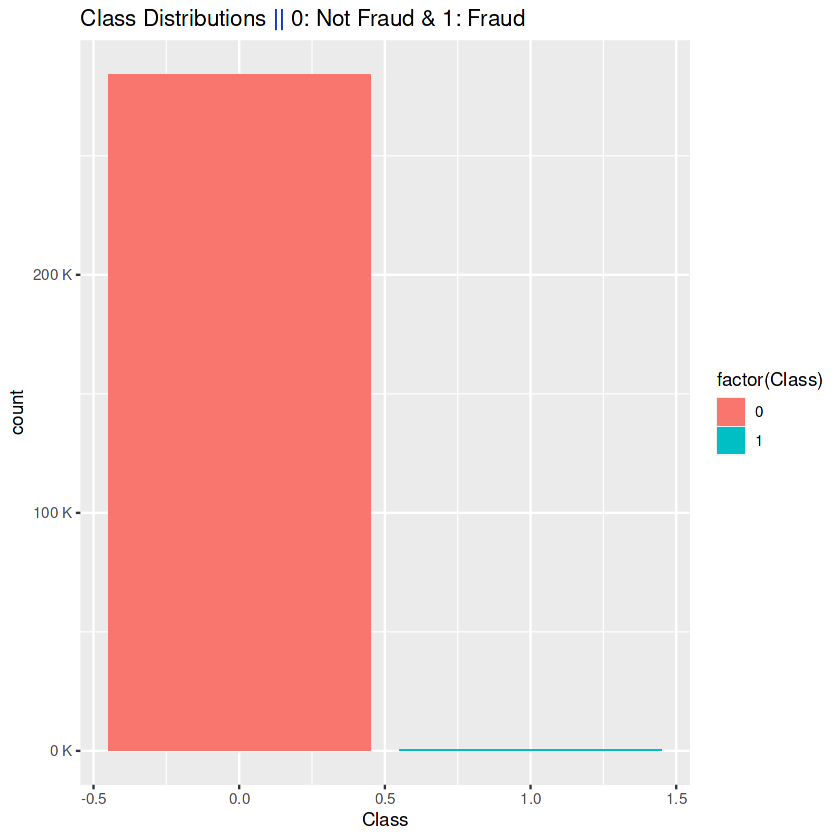

In [8]:
# plot the class frequency of the original dataset
ggplot(data = df) + 
    geom_bar(aes(x = Class, fill = factor(Class))) +
    labs(title = "Class Distributions || 0: Not Fraud & 1: Fraud") + 
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3))    

**Target variable**: We've already known about the imbalance in our original dataset. The majority of transactions are 'Not fraud' (99.83%).The fraud transaction only account for 0.17% in the dataset

**Problems of imbalanced dataset:** If we use this dataset as the foundation for our predictive models and analysis, we may encounter significant errors. Our models are likely to overfit, as they will falsely assume that the majority of transactions are 'Not fraud'. It is important to employ specific techniques to address this issue. We will discuss these techniques in detail in [Part 2 Techniques to Handle Imbalanced Data](#technique).

No id variables; using all as measure variables



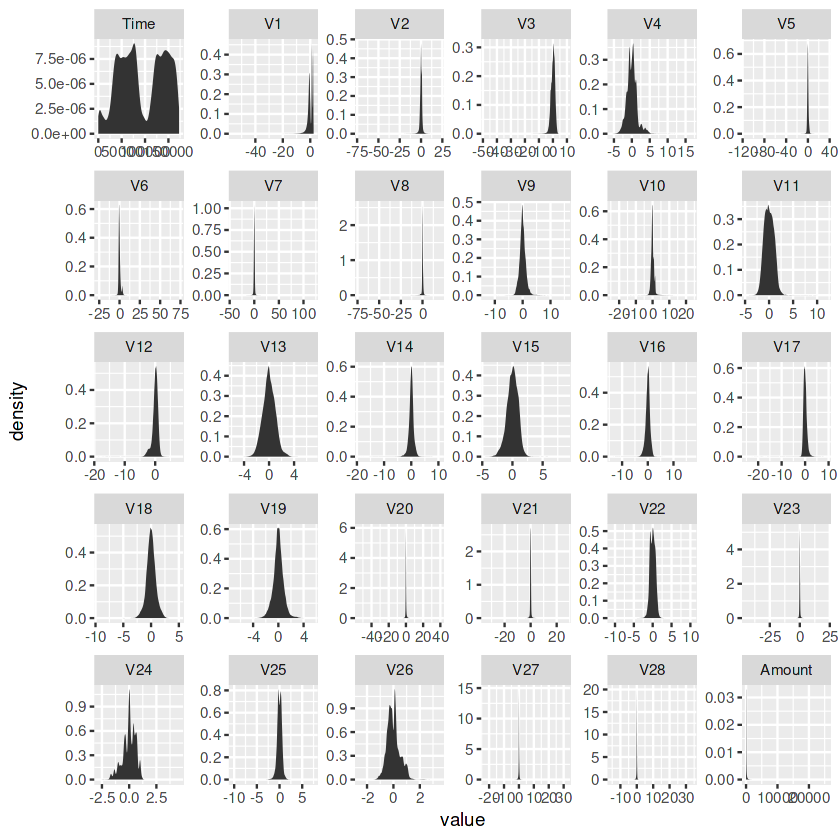

In [9]:
# plot the distribution of all feature variables
ggplot(data = melt(df[,-31]), aes(x = value)) + 
    stat_density() + 
    facet_wrap(~variable, scales = "free")

**Distribution of all the feature variables:** By examining the distribution of the feature, we can gain insights into its underlying characteristics and patterns. This analysis involves exploring the range, central tendency, spread, skewness, and other statistical properties of the feature's values.

In [10]:
# scale the Time and Amount in R
df$Time <- scale(df$Time)
df$Amount <- scale(df$Amount)

**Features V1, V2, ... V28:** We know that all these features is the result of PCA (Principal Component Analysis) transformation. It is important to note that when implementing a PCA, it is necessary to scale the features beforehand. So all these feature have already scaled.

**Features 'Time' and 'Amount':** It is important to note that these columns should be scaled along with the other columns in the dataset. This helps maintain the integrity and comparability of the dataset, enabling effective analysis and modeling.

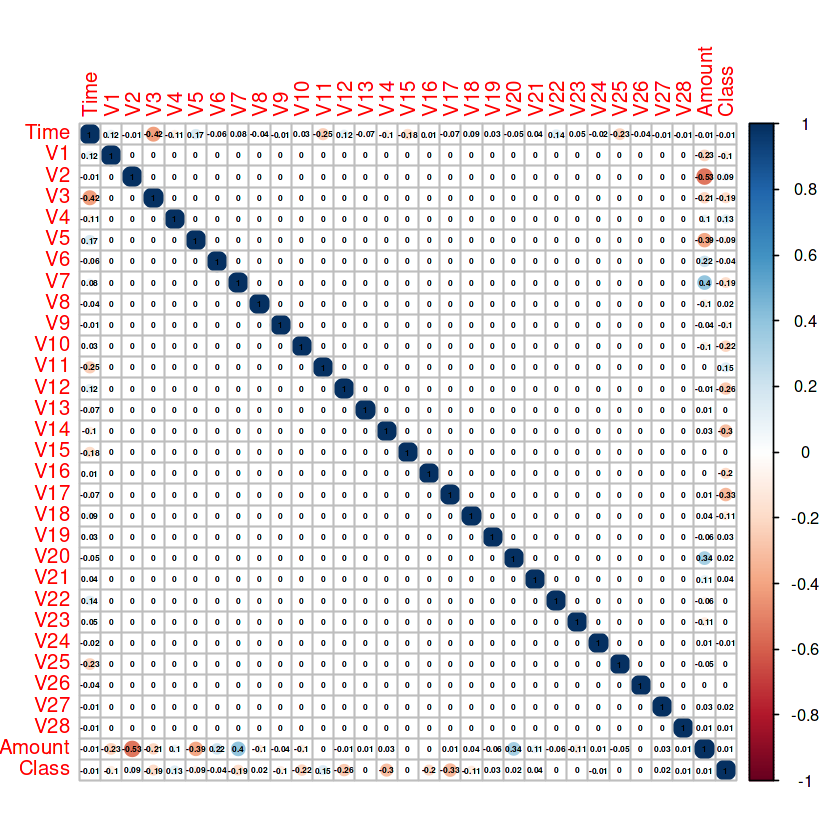

In [11]:
# plot the correlation matrix
corrplot(cor(df), addCoef.col = 1, number.cex = 0.4)

**Correlation plot**: By examining the correlation plot, we can gain insights into the relationships between the feature variables and target variables in the dataset. The correlation plot provides a comprehensive view of the pairwise correlations, allowing us to identify patterns and dependencies between variables. Here are some feature variables that exhibit noticeable correlation with the target variable: 
- *Positive correlation:* 'V2', 'V4' and 'V11'.
- *Negative correlation:* 'V3', 'V7', 'V10', 'V12', 'V14', 'V16', and 'V17'.
- The remaining variables have very weak or no correlation with the target variable.

---


## 2. Techniques to Handle Imbalanced Data <a name="technique"></a>

There are many techniques used for handling imbalanced datasets:

- **Undersampling**: This technique involves randomly removing samples from the majority class to reduce its dominance. This approach can help balance the classes, but it also runs the risk of discarding potentially useful information.

- **Oversampling:** Randomly duplicating samples from the minority class can increase its representation in the dataset. This approach helps address the class imbalance, but it may also lead to overfitting if the duplicated samples introduce too much redundancy.

- **SMOTE**: SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic examples of the minority class by interpolating between minority class instances and their nearest neighbors. This helps to increase the representation of the minority class and improve the performance of machine learning models in handling imbalanced datasets.

- **ADASYN**: ADASYN (Adaptive Synthetic Sampling) is an extension of SMOTE that generates synthetic samples in a more adaptive manner. It focuses on areas with a higher density of minority class samples and generates more synthetic samples in those regions.

*In this project, I will employ the* **undersampling technique** *as a means to address the issue of class imbalance in the dataset.*

---

## 3. Modeling: Deal with imbalanced data <a name="model"></a>

### Data Splitting <a name="datasplitting"></a>

Before apply these techniques, we need to divide the original dataset into train set and test set. 

The split ratio here is 0.8.

In [12]:
# Change the target variable to factor type
df$Class <- as.factor(df$Class)
str(df$Class)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [13]:
# Split the original data into train set and test set
set.seed(100)
ind = sample.split(df, SplitRatio = 0.8) # split ratio is 0.8.
train = df[ind, ]
test =  df[!ind, ]
print(paste("Train set: ", nrow(train), "Observations"))
print(paste("Test set : ", nrow(test), "Observations"))

# see the proportion of the target variable in train set and test set
print("Class Proportion (%) in Trainset and Testset || 0: Not Fraud & 1: Fraud")
cbind(Trainset = prop.table(table(train$Class)) * 100, 
      Testset = prop.table(table(test$Class)) * 100)

[1] "Train set:  220497 Observations"
[1] "Test set :  64310 Observations"
[1] "Class Proportion (%) in Trainset and Testset || 0: Not Fraud & 1: Fraud"


,Trainset,Testset
0,99.826755,99.8289535
1,0.173245,0.1710465


**Class Frequency:** The percentage frequency of target variable in both train set and test set is relatively similar to the original dataset. So, now let's apply the techniques we discussed above to the train set to solve the imbalanced problem.

So, now let's apply the **undersampling technique** we discussed above to the train set to solve the imbalanced problem.


### Advantage & Disadvantage of the undersampling technique <a name="adv"></a>

In simple terms, *Undersampling* randomly remove instances from the majority class to match the number of instances in the minority class.

**Advantage of undersampling:** Undersampling, as a technique for addressing class imbalance, offers several advantages:

- *Improved computational efficiency:* Undersampling reduces the size of the majority class, resulting in a smaller dataset. This can lead to faster computation times during the model training process, as fewer instances need to be processed.

- *Reduced bias towards the majority class:* Class imbalance can cause models to be biased towards predicting the majority class. By undersampling the majority class, the training data becomes more balanced, allowing the model to pay equal attention to both classes and potentially improving its ability to learn patterns from the minority class.

- *Mitigation of overfitting:* With a more balanced dataset, the risk of overfitting, where the model memorizes the majority class and fails to generalize to new data, is reduced. Undersampling can help prevent the model from becoming overly specialized in predicting the majority class, leading to improved generalization performance.

- *Enhanced interpretability:* Undersampling can simplify the data representation by reducing the imbalance between classes. This can make it easier to interpret and understand the underlying patterns and relationships in the data.

- *Focus on informative minority instances:* By undersampling the majority class, the training data becomes enriched with the minority class instances. This allows the model to pay more attention to the informative minority instances and capture their unique characteristics, potentially leading to better predictive performance for the minority class.

**Disadvantage of undersampling:** While undersampling can be an effective technique for addressing class imbalance, it also has some potential disadvantages to consider:

- *Information loss:* Undersampling involves reducing the size of the majority class by randomly removing instances. This can lead to a significant loss of data, potentially discarding valuable information that could be useful for training the model.

- *Risk of removing important instances:* Randomly selecting instances from the majority class for removal may inadvertently eliminate crucial data points that are essential for understanding the underlying patterns and characteristics of the class.

- *Potential bias:* Undersampling can introduce bias in the dataset, as it focuses only on a subset of instances from the majority class. This can result in an incomplete representation of the class distribution, leading to biased predictions and inaccurate model performance.

- *Increased variability:* With a smaller sample size, there is a higher chance of variability in the training data, which can affect the stability and generalizability of the model. It may be more prone to overfitting, where the model learns the specifics of the training data too well and struggles to generalize to new, unseen data.

- *Sensitivity to sampling strategy:* The effectiveness of undersampling can depend on the specific sampling strategy used. Different sampling techniques may yield different results, and choosing an inappropriate strategy could lead to suboptimal performance.

### Implement the undersampling technique (50/50 ratio) <a name="implement0.5"></a>

In R, you can use the *ovun.sample()* function to undersample the train set.

In [14]:
# find the number observations of fraud transaction
nrow_fraud <- nrow(train[train$Class == 1, ])

# We want the ratio between class 0 and class 1 in the dataset to be 50/50 to achive a balanced dataset
undersample_frac <- 0.5

# find the desired sample size when applying the undersampling technique.
undersample_size <- nrow_fraud/undersample_frac

# undersample the dataset
undersample <- ovun.sample(Class ~ ., data = train, method = "under", N = undersample_size, seed = 123)
undersample_df <- undersample$data

print("Class Frequency before and after using undersampling techniques || 0: Not Fraud & 1: Fraud")
cbind(Before = table(train$Class), After = table(undersample_df$Class))

[1] "Class Frequency before and after using undersampling techniques || 0: Not Fraud & 1: Fraud"


,Before,After
0,220115,382
1,382,382


After undersampling, the ratio between the classes in the train set is precisely 50/50, meaning that we have an equal representation of both the positive and negative classes. This balanced strain set allows us to train our machine learning models more effectively, as it provides a fair and representative dataset for learning and evaluation purposes.

### Build model

After using the undersampling technique for the train set, I apply a variety of predictive models to detect fraudulent transactions:

- **Random Forest:** Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It uses random subsets of data and features for training each tree. Predictions are made by majority voting for classification or averaging for regression. Random Forest reduces overfitting and handles imbalanced data well. It provides feature importance and can be parallelized for faster processing.

- **k-Nearest Neighbours:** K-Nearest Neighbors (KNN) is a non-parametric classification algorithm. It assigns a class label to a data point based on the majority class of its k nearest neighbors. The value of k determines the number of neighbors considered. KNN is simple to understand and implement, but sensitive to the choice of k and distance metric. It can handle both classification and regression problems. However, it is computationally expensive for large datasets and doesn't provide explicit feature importance.

- **Logistic Regression:** Logistic Regression is used for binary classification. It estimates the probability of an event occurring based on the relationship between the predictor variables and the binary outcome. It assumes a linear relationship between the predictors and the log-odds of the outcome. 


By leveraging different models, I want to identify patterns that can accurately classify transactions as either 'Fraud' or 'Not Fraud'. This approach allows us to explore the effectiveness of each model in detecting fraud and compare their performance against the imbalanced dataset. 

### Evaluate model

Once the model has been constructed using the training set, it will be assessed by applying it to the test set. This evaluation process involves examining various performance metrics to gauge the model's effectiveness.

When evaluating models with an imbalanced dataset, it is important to consider the specific challenges posed by the class imbalance. Traditional evaluation metrics such as accuracy may be misleading. Instead, it is recommended to focus on metrics that provide a more comprehensive understanding of the model's performance:

- **Confusion Matrix:** This matrix provides a breakdown of the true positive, true negative, false positive, and false negative predictions. It helps assess the model's ability to correctly classify both the minority and majority classes.

- **Precision = TP/(TP+FP):** Precision measures the proportion of correctly predicted positive instances out of all predicted positive instances. It focuses on the accuracy of positive predictions and is useful when the cost of false positives is high.

- **Recall = TP/(TP+FN):** Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It evaluates the model's ability to identify the minority class instances.

- **F1-Score:** The F1-score combines precision and recall into a single metric. It provides a balance between precision and recall and is useful when both false positives and false negatives need to be minimized.

- **Area Under the Precision-Recall Curve (AUPRC):** The Precision-Recall curve is a graphical representation of the trade-off between precision and recall for different classification thresholds. The AUPRC quantifies the overall performance of the model by calculating the area under the precision-recall curve. It provides a single-value summary of the model's ability to balance precision and recall across different classification thresholds. A higher AUPRC indicates better performance, with values ranging from 0 to 1.

In [15]:
# create list of models 
model_name <- c( "rf", "knn", "glm")

# this variable is used to store the evaluation metrics
evaluation <- matrix(nrow = 0, ncol = 5) 
# this variable is used to store confusion matrices
list_confusion_matrix <- list() 

for (methods in model_name){
    # build model on train set
    set.seed(1)
    model <- train(Class ~ ., 
                   data = undersample_df, 
                   method = methods, 
                   trControl = trainControl(method = "cv", number = 5))

    # use the model to predict on test set
    predictions <- predict(model, newdata = test) # predict the target
    preds <- predict(model, newdata = test, type = "prob")[,2] # predict probability of positive class
    preds_pos <- preds[test$Class==1] # preds for true positive class
    preds_neg <- preds[test$Class==0] # preds for true negative class

    # calculate evaluation metrics 
    accuracy <- sum(predictions == test$Class) / length(test$Class)
    cm <- confusionMatrix(predictions, test$Class)$table
    precision <- cm[2, 2]/(cm[2, 2] + cm[2, 1]) # TP/(TP+FP)
    recall <- cm[2, 2]/(cm[2, 2] + cm[1, 2]) # TP/(TP+FN)
    f1 <- 2 * (precision * recall) / (precision + recall)
    auprc <- pr.curve(preds_pos, preds_neg)$auc.integral

    # store calculated metrics and confusion matrices
    evaluation <- rbind(c(accuracy, precision, recall, f1, auprc), evaluation)
    list_confusion_matrix[[length(list_confusion_matrix)+1]] <- list(cm)
}

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [16]:
print("Undersampling with the ratio of positive class is 0.5")

# see evaluation metrics of all models
print("The evaluation metrics of 3 models: ")
colnames(evaluation) <- c("Accuracy", "Precision", "Recall", "F1", "AUPRC")
rownames(evaluation) <- c("Random Forest", "K-nearest neighbors", "Logistic Regression")
evaluation

# see the confusion matrices of all models
print("The confusion matrices of 3 models: ")
names(list_confusion_matrix) <- c("Random Forest", "K-nearest neighbors", "Logistic Regression")
list_confusion_matrix

[1] "Undersampling with the ratio of positive class is 0.5"
[1] "The evaluation metrics of 3 models: "


,Accuracy,Precision,Recall,F1,AUPRC
Random Forest,0.9514072,0.03342618,0.9818182,0.0646513,0.5403284
K-nearest neighbors,0.9716840,0.05419489,0.9454545,0.1025136,0.2936436
Logistic Regression,0.9788524,0.07191781,0.9545455,0.1337580,0.7301936


[1] "The confusion matrices of 3 models: "


$`Random Forest`
$`Random Forest`[[1]]
          Reference
Prediction     0     1
         0 62845     5
         1  1355   105


$`K-nearest neighbors`
$`K-nearest neighbors`[[1]]
          Reference
Prediction     0     1
         0 62385     6
         1  1815   104


$`Logistic Regression`
$`Logistic Regression`[[1]]
          Reference
Prediction     0     1
         0 61077     2
         1  3123   108



### Interpret the evaluation metrics

- **Accuracy:** The accuracy scores of all three models are very high (> 95%). But as I have said earlier, Accuracy is not a reliable evaluation metric for imbalanced data because it can be misleading.

- **Precision:**  From the results, the Precision scores of all three models is very low (less than 10%). This means that *of all the transactions predicted by the model to be fraudulent*, less than 10% of the transactions are correctly predicted to be fraudulent. The 'Logistic Regression' model has the best Precision score (7.19%).

- **Recall:** The Recall scores of all models are very high (> 95%). Recall, also known as sensitivity or true positive rate, measures the model's ability to identify all positive instances correctly. This means that *of all the transactions that are actually fraudulent*, our models correctly predicted more than 95% of them. The 'Random Forest' model has the best Recall score (98.18%).

- **F1-Score:** F1 Scores is the harmonic mean of Precision and Recall, providing a balanced assessment of the model's performance. The 'Logistic Regression' model has the best F1 score (0.13).

- **Area Under the Precision-Recall Curve (AUPRC):** AUPRC captures the trade-off between identifying true positive cases while minimizing false positives. The 'Logistic Regression' model has the best AUPRC score (0.73).

- **Overall:** 
    - **Best model:** The 'Logistic Regression' shows the best results on our test set. 
    - **Problem with our models:** Our models accurately identify fraudulent transactions, but they also generate a notable number of false positives, mistakenly classifying legitimate transactions as fraudulent. While the high accuracy is good, the significant false positive rate is concerning as it inconveniences customers and can trigger unnecessary investigations.
    - **Solve the problem:** It is crucial to strike a balance between correctly identifying fraudulent transactions and minimizing false positives. The current models may have a bias towards sensitivity, where they prioritize capturing fraudulent cases at the expense of misclassifying non-fraudulent transactions. To address this issue, we need to explore techniques that can improve the precision of our models, such as adjusting classification thresholds.

<div id='implement0.2'/>

### Implement the undersampling technique (80/20 ratio) <a name="implement0.5"></a>

As I just said, we can adjust the classification threshold to improve the precision of our models. Instead of using a 0.5 ratio for undersampling, I have opted for a lower ratio of 0.2 to decrease the sensitivity of the positive class. The lower ratio helps to address the class imbalance issue and potentially improves the overall performance and generalization ability of our models.

In [17]:
nrow_fraud <- nrow(train[train$Class == 1, ])
undersample_frac_0.2 <- 0.2 # We want the ratio between class 0 and class 1 in the dataset to be 80/20 
undersample_size_0.2 <- nrow_fraud/undersample_frac_0.2
undersample_0.2 <- ovun.sample(Class ~ ., data = train, method = "under", N = undersample_size_0.2, seed = 123)
undersample_df_0.2 <- undersample_0.2$data

print("Class Frequency before and after using undersampling techniques || 0: Not Fraud & 1: Fraud")
cbind(Before = table(train$Class), After = table(undersample_df_0.2$Class))

[1] "Class Frequency before and after using undersampling techniques || 0: Not Fraud & 1: Fraud"


,Before,After
0,220115,1528
1,382,382


### Build & Evaluate model

As we can see, the ratio between the classes in this train test is 80/20 instead of 50/50. Now, let's use this train set to build models. After building the models, I will apply the model to the test set to examine performance metrics. We hope to see less false positive in this case.

In [18]:
model_name <- c( "rf", "knn", "glm")


evaluation_0.2 <- matrix(nrow = 0, ncol = 5) 
list_confusion_matrix_0.2 <- list() 


for (methods in model_name){
    set.seed(1)
    model <- train(Class ~ ., 
                   data = undersample_df_0.2, 
                   method = methods, 
                   trControl = trainControl(method = "cv", number = 5))

    predictions <- predict(model, newdata = test) 
    preds <- predict(model, newdata = test, type = "prob")[,2]
    preds_pos <- preds[test$Class==1]
    preds_neg <- preds[test$Class==0]


    accuracy <- sum(predictions == test$Class) / length(test$Class)
    cm <- confusionMatrix(predictions, test$Class)$table
    precision <- cm[2, 2]/(cm[2, 2] + cm[2, 1]) 
    recall <- cm[2, 2]/(cm[2, 2] + cm[1, 2]) 
    f1 <- 2 * (precision * recall) / (precision + recall)
    auprc <- pr.curve(preds_pos, preds_neg)$auc.integral


    evaluation_0.2 <- rbind(c(accuracy, precision, recall, f1, auprc), evaluation_0.2)
    list_confusion_matrix_0.2[[length(list_confusion_matrix_0.2)+1]] <- list(cm)
}

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [19]:
print("Undersampling with the ratio of positive class is 0.2")

# see evaluation metrics of all models 
print("The evaluation metrics of 3 models after adjusting the ratio: ")
colnames(evaluation_0.2) <- c("Accuracy", "Precision", "Recall", "F1", "AUPRC")
rownames(evaluation_0.2) <- c("Random Forest", "K-nearest neighbors", "Logistic Regression")
evaluation_0.2

# see the confusion matrices of all models
print("The confusion matrices of 3 models after adjusting the ratio: ")
names(list_confusion_matrix_0.2) <- c("Random Forest", "K-nearest neighbors", "Logistic Regression")
list_confusion_matrix_0.2

[1] "Undersampling with the ratio of positive class is 0.2"
[1] "The evaluation metrics of 3 models after adjusting the ratio: "


,Accuracy,Precision,Recall,F1,AUPRC
Random Forest,0.9882133,0.1206089,0.9363636,0.2136929,0.6760327
K-nearest neighbors,0.9936868,0.2028112,0.9181818,0.3322368,0.5844303
Logistic Regression,0.9948686,0.2380952,0.9090909,0.3773585,0.7552765


[1] "The confusion matrices of 3 models after adjusting the ratio: "


$`Random Forest`
$`Random Forest`[[1]]
          Reference
Prediction     0     1
         0 63880    10
         1   320   100


$`K-nearest neighbors`
$`K-nearest neighbors`[[1]]
          Reference
Prediction     0     1
         0 63803     9
         1   397   101


$`Logistic Regression`
$`Logistic Regression`[[1]]
          Reference
Prediction     0     1
         0 63449     7
         1   751   103



### Interpret the evaluation metrics after adjusting the threshold

- **Precision:** By adjusting the ratio of the positive class from 0.5 to 0.2, we aim to reduce the sensitivity of the models towards the positive class. After implementing this adjustment, we observe a notable improvement in the precision score across all three models.
    - *Random Forest:* The Precision score increases from 3.34% to 12.06%.
    - *K-nearest Neighbors:* The Precision score increases from 5.42% to 20.28%.
    - *Logistic Regression:* The Precision score increases from 7.19% to 23.81%.
    - The 'Logistic Regression' model still has the best Precision score (23.81%).

- **Recall:** As the Precision score increases, there is typically a decrease in the Recall score. When the model becomes more conservative, it increases the number of false positives, resulting in lower Precision. Conversely, when the model becomes more liberal, it increases the number of false positives negatives, resulting in lower Recall. 
    - *Random Forest:* The Recall score decreases from 98.18% to 93.64%.
    - *K-nearest Neighbors:* The Recall score decreases from 94.55% to 91.82%.
    - *Logistic Regression:* The Recall score decreases from 95.45% to 90.91%.
    - The 'Random Forest' model still has the best Recall score (93.64%).

- **F1-Score:** It is crucial to assess other evaluation metrics such as F1 score to gain a more comprehensive understanding of both Precision and Recall scores. We see that the F1 scores of all the models are increases.
    - *Random Forest:* The F1 score increases from 0.06 to 0.21.
    - *K-nearest Neighbors:* The F1 score increases from 0.1 to 0.33.
    - *Logistic Regression:* The F1 score increases from 0.13 to 0.38.
    - The 'Logistic Regression' model still has the best F1 score (0.38).

- **Area Under the Precision-Recall Curve (AUPRC):** Like F1, we also see an increase in AUPRC in all models.
    - *Random Forest:* The AUPRC score increases from 0.54 to 0.68.
    - *K-nearest Neighbors:* The AUPRC score increases from 0.29 to 0.58.
    - *Logistic Regression:* The AUPRC score increases from 0.73 to 0.76.
    - The 'Logistic Regression' model still has the best AUPRC score (0.75).

- **Overall:** 
    - **Best model:** The 'Logistic Regression' model still shows the best results on our test set. 
    - **Adjust the ratio of positive class in undersampling:** By adjusting the class ratio from 0.5 to 0.2, we have effectively altered the models' decision. This adjustment allows us to strike a better trade-off between correctly identifying positive instances and minimizing false positives, ultimately enhancing the models' precision performance.
    - **The trade-off between precision and recall:** In summary, the trade-off between Precision and Recall is a common observation in classification tasks. Increasing precision often leads to a decrease in recall and vice versa. Understanding this trade-off and choosing the appropriate balance between precision and recall is crucial in developing models that meet the specific requirements and objectives of the task at hand.

*How can we choose the appropriate balance between Precision and Recall ?*

*Now I will introduce you to another key evaluation framework:* **Expected value.**

---

## 4. A Key Analytical Framework: Expected Value <a name="expectedvalue"></a>

When it comes to choosing the appropriate balance between Precision and Recall, the expected value framework can be a helpful tool. The expected value takes into account the potential costs or benefits associated with different types of classification errors.

In real-world scenarios, the costs of false positives and false negatives can vary. For example, in fraud detection:
- A false positive (labeling a legitimate transaction as fraudulent) may inconvenience customers.
- A false negative (failing to detect a fraudulent transaction) can result in financial losses. 

The expected value framework allows us to quantify these costs and make decisions based on the overall expected value.

### Calculate Expected Value <a name="calculateexpectedvalue"></a>

The expected value is then the weighted average of the values of the different possible outcomes, where the weight given to each value is its probability of occurrence.

$EV$ $=$  $p_{1}$ * $v_{1}$ + $p_{2}$ * $v_{2}$ + $p_{3}$ * $v_{3}$ + ...

Where
- $v_{i}$ is the value (costs and benefits) of one outcome.
- $p_{i}$ is the probability of that outcome.

We need two things to calculate the expected value:

**(1) The cost and benefit values ($v_{i}$):** We assign a cost to each false positive and false negative, as well as a benefit to each true positive and true negative. These values can be determined based on the specific context and the impact of each type of classification error.

**(2) Probability of occurrence of different outcomes ($p_{i}$):** The probabilities can be estimated from the tallies in the confusion matrix by computing the rates of the errors and correct decisions.

Once we have the cost and benefit values and the probabilities, we can calculate the expected value for different classification thresholds. By comparing the expected values at different thresholds, we can identify the threshold that maximizes the overall expected value. This threshold represents the optimal balance between precision and recall in terms of the specific costs and benefits of classification errors.





### Using Expected Value to choose the appropriate balance between Precision and Recall <a name="useexpectedvalue"></a>

In the previous section, we've built models with two undersampling rate and we want to know which rate is better: 0.5 or 0.2 ? 

When we adjust the undersampling rate, we are essentially adjusting the trade-off between precision and recall. A higher undersampling rate may lead to lower precision but potentially higher recall.

To determine which undersampling rate is better, we need to evaluate the performance of our model using both undersampling rates. Then, we consider the costs to different type of errors, as well as benefits when we predict correctly. These values can vary depending on the specific context and the consequences of different types of errors. In our project, let's consider two scenarios and assign different costs and benefits for each scenario.

#### (1) Find the cost and benefit values ($v_{i}$)

While the probabilities can be estimated from data, the costs and benefits often cannot. They depend on external information. It's important to note that determining the cost and benefit values can be subjective and context-dependent. It requires a deep understanding of the problem domain and the potential consequences of different types of errors. 


**Scenario A:**

- **A true negative** is a transaction which is predicted to be 'Not Fraud' and it is correctly predicted. The benefit in this case is zero (no profit but no cost).

- **A false positive** occurs when we classify a transaction as 'Fraud' and therefore target it, but in reality it's not. The cost of this type of error can include inconveniencing the customer, triggering unnecessary investigations, and potentially damaging the relationship between the customer and the business. In this scenario, let's assume the fixed cost of a false positive is 100 USD. This means that for every legitimate transaction that is incorrectly flagged as fraudulent, the organization incurs a cost of 100 USD.

- **A false negative** is a transaction which is predicted to be 'Not Fraud' (so the system doesn't target it), but in reality the transaction is a 'Fraud'. This means that the fraudster successfully bypassed the detection system. The cost is potential financial losses, reputational damage, and increased risk for the organization.  let's assume the fixed cost of a false negative is 1,000 USD. This means that for every fraudulent transaction that is incorrectly classified as legitimate, the organization incurs a cost of 1,000 USD.

- **A true positive** refers to the correct identification of a transaction as fraudulent. Preventing fraudulent transactions is the  responsibility of the financial institution. Therefore, when it successfully prevents fraudulent transactions, it doesn't directly generate a specific financial benefit for itself. The benefit in this case is zero (no profit but no cost). 

**Scenario B:**

- Let's assume the cost of **A false positive** in this scenario is 10 USD instead of 100 USD like scenario A.
- The cost of **A false negative** is 100,000 USD instead of 1,000 USD like scenario A.
- The remaining benefits are zero, the same as the scenario A.

In [20]:
# the costs and benefits in scenario A
cost_benefit_A <- c(0, -100, -1000, 0)

# the costs and benefits in scenario B
cost_benefit_B <- c(0, -10, -100000, 0)

#### (2) Find the probabilities of occurrence of different outcomes ($p_{i}$)

Like I said earlier, the probabilities can be estimated from the tallies in the confusion matrix. To calculate the probabilities, we divide each cell value of the confusion matrix by the total number of observations in the test set. 

We now calculate the probabilities of two models:
- Logistic Regression with the undersampling ratio is **50/50**
- Logistic Regression with the undersampling ratio is **80/20**

In [21]:
# the probabilities (undersampling with ratio 50/50) 
prob_0.5 <- unlist(list_confusion_matrix$'Logistic Regression')/nrow(test)

# the probabilities (undersampling with ratio 80/20) 
prob_0.2 <- unlist(list_confusion_matrix_0.2$'Logistic Regression')/nrow(test)

#### Calculate the Expect Value in two scenario A and B

We will choose the model that minimize the cost for the business.

**Scenario A**

- The cost of a false positive is 100 USD.
- The cost of a false negative is 1,000 USD.

Use the *weighted.mean()* function to calculate the expected value in each model. 

In [22]:
print("The Expected Value of the model with the undersampling ratio is 50/50: ")
weighted.mean(cost_benefit_A, prob_0.5)

print("The Expected Value of the model with the undersampling ratio is 80/20: ")
weighted.mean(cost_benefit_A, prob_0.2)

[1] "The Expected Value of the model with the undersampling ratio is 50/50: "


[1] -4.887265

[1] "The Expected Value of the model with the undersampling ratio is 80/20: "


[1] -1.276629

**Results**

- **Model 1: Logistic Regression with the undersampling ratio is 50/50**: The expected value means that if we apply this model to a population and prevent the transaction that classifies as 'Fraud', we can expect to have an average cost about **-4.89 USD** per transaction.
- **Model 2: Logistic Regression with the undersampling ratio is 80/20**: The expected value means that if we apply this model to a population and prevent the transaction that classifies as 'Fraud', we can expect to have an average cost about **-1.28 USD** per transaction.

&rarr; *In scenario A, we would prefer model 2 because it help minimize the cost of fraud transaction for business.*


**Scenario B**

- The cost of a false positive is 10 USD.
- The cost of a false negative is 100,000 USD.

In [23]:
print("The Expected Value of the model with the undersampling ratio is 50/50: ")
weighted.mean(cost_benefit_B, prob_0.5)

print("The Expected Value of the model with the undersampling ratio is 80/20: ")
weighted.mean(cost_benefit_B, prob_0.2)

[1] "The Expected Value of the model with the undersampling ratio is 50/50: "


[1] -3.595553

[1] "The Expected Value of the model with the undersampling ratio is 80/20: "


[1] -11.00155

**Results**

- **Model 1: Logistic Regression with the undersampling ratio is 50/50**: The expected value means that if we apply this model to a population and prevent the transaction that classifies as 'Fraud', we can expect to have an average cost about **-3.6 USD** per transaction.
- **Model 2: Logistic Regression with the undersampling ratio is 80/20**: The expected value means that if we apply this model to a population and prevent the transaction that classifies as 'Fraud', we can expect to have an average cost about **-11 USD** per transaction.

&rarr; *In scenario B, we would prefer model 1 because it help minimize the cost of fraud transaction for business.*


### Decision Making base on the Expected Value framework <a name="decisionexpectedvalue"></a>

When it comes to choosing the appropriate undersampling rate, it's important to consider the specific costs and benefits associated with each scenario. With different cost and benefit in each scenario, we choose different undersampling rate.

- **Scenario A:** The cost of false positives is high (100 USD) and the cost of false negatives is relatively low (1,000 USD). It may be more beneficial to have a lower undersampling rate, such as 0.2. This model is less sensitive to positive class, so it will likely lead to a higher precision, minimizing the number of false positive predictions.
- **Scenario B:** On the other hand, if the cost of false positives is low (10 USD) and  the cost of false negatives is high (100,000 USD), it may be more beneficial to have a higher undersampling rate, such as 0.5. This model is more sensitive to positive class, so it will increase the recall, ensuring that more instances of the minority class are detected and minimizing false negatives.

In summary, we can use the Expected Value framework to choose the appropriate balance between Precision and Recall. The choice of undersampling rate should be driven by a cost-benefit analysis that considers the specific costs of false positives and false negatives, as well as the benefits of true positives. By choosing the appropriate undersampling rate, we can optimize the performance of the model and achieve the desired balance between precision and recall in each scenario.

---

## 5. Conclusion <a name="conclusion"></a>

Overall, the developed fraud detection model shows promise in enhancing fraud prevention efforts, reducing financial losses, and improving security. Further research and refinement of the model can lead to even better performance and contribute to the ongoing fight against fraudulent activities.

**Summary:**

- **Impact of Undersampling:** Using undersampling technique help us address class imbalance and improve the model's ability to capture patterns related to fraudulent transactions.

- **Model Performance:** We've used various machine learning techniques such as Random Forest, k-Nearest Neighbors, and Logistic Regression, demonstrates promising capabilities in detecting fraudulent transactions. Throughout the evaluation process, we assessed the model's performance using metrics such as accuracy, precision, recall, F1 score, and AUPRC.Among the evaluated models, Logistic Regression stands out as the top performer. It achieves the highest AUPRC and F1 score, reflecting its ability to balance precision and recall effectively. This suggests that the Logistic Regression model can accurately identify a substantial number of fraudulent transactions while minimizing false positives.

- **Trade-off Between Precision and Recall:** We've discussed the trade-off between precision and recall in the fraud detection model. We've built the models with different undersampling rate like 0.5 or 0.2 to see how adjusting the classification threshold can impact the balance between correctly identifying fraud (recall) and minimizing false positives (precision).

- **Consideration of Costs and Benefits:** We've emphasized the importance of considering the costs and benefits associated with different types of classification errors. We also used the expected value framework to guide the decision-making process and choose an appropriate undersampling rate.

- **Recommendations for Future Improvement:** For futere improment, we can explore other techniques such as oversampling, ensemble methods, or advanced anomaly detection algorithms. Additionally, we can use more advanced machine learning models.

However, it is important to note that no model is perfect, and the effectiveness of the fraud detection model may vary depending on the dataset and evolving fraud patterns. Regular monitoring and fine-tuning of the model are necessary to ensure its continued accuracy and adaptability to changing fraud scenarios.